In [ ]:
# INF2178 Assignment 2
# Student Name: Songjia Liu
# Student Number: 1005137503

In [ ]:
# Data uploading

In [ ]:
# Import packages needed
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
%pip install bioinfokit
from bioinfokit.analys import stat

  Using cached bioinfokit-2.1.3-py3-none-any.whl
  Using cached textwrap3-0.9.2-py2.py3-none-any.whl (12 kB)
  Using cached adjustText-1.0.4-py3-none-any.whl (11 kB)


In [ ]:
# Load data file
from google.colab import drive
drive. mount('/drive',force_remount = True)
df = pd.read_excel('/drive/MyDrive/INF2178_A2_data.xlsx')
df.head(10)

Mounted at /drive


,_id,LOC_ID,LOC_NAME,AUSPICE,ADDRESS,PCODE,ward,bldg_type,BLDGNAME,IGSPACE,TGSPACE,PGSPACE,KGSPACE,SGSPACE,TOTSPACE,subsidy,cwelcc_flag
0,1,1013,Lakeshore Community Child Care Centre,Non Profit Agency,101 SEVENTH ST,M8V 3B5,3,Public Elementary School,Seventh Street Public School,0,20,32,52,60,164,Y,Y
1,2,1014,Alternative Primary School Parent Group,Non Profit Agency,1100 SPADINA RD,M5N 2M6,8,Public Elementary School,North Preparatory Public School,0,0,12,26,45,83,Y,Y
2,3,1015,Cardinal Leger Child Care Centre (Scarborough),Non Profit Agency,600 MORRISH RD,M1C 4Y1,25,Catholic Elementary School,Cardinal Leger Catholic School,0,10,16,26,50,102,Y,Y
3,4,1016,George Brown - Richmond Adelaide Childcare Centre,Non Profit Agency,130 ADELAIDE ST W,M5H 3P5,10,Other,NaN,10,15,40,0,0,65,Y,Y
4,5,1017,Woodland Nursery School (Warden Woods Communit...,Non Profit Agency,1 FIRVALLEY CRT,M1L 1N8,20,High Rise Apartment,NaN,0,10,16,0,0,26,Y,Y
5,6,1021,Centennial College Progress Campus Child Care ...,Non Profit Agency,941 PROGRESS AVE,M1G 3T8,24,Community College/University,Centennial College Of Applied Arts & Technology,10,20,32,0,0,62,Y,Y
6,7,1029,Air-O-Down Child Care Centre,Non Profit Agency,7 HAWKSDALE RD,M3K 1W3,6,Public High School,Downsview Secondary School,10,15,24,0,0,49,Y,Y
7,8,1031,Cedarbrae Day Nurseries (20 Greencrest),Commercial Agency,20 GREENCREST CIRCT,M1G 1B8,24,High Rise Apartment,Greencrest Property,0,0,16,0,30,46,Y,Y
8,9,1037,Tiago Avenue Community Child Care,Non Profit Agency,145 TIAGO AVE,M4B 2A6,19,Public Elementary School,Victoria Park Public School,0,0,21,0,30,51,Y,Y
9,10,1041,Ledbury Park Child Care Program,Non Profit Agency,95 FALKIRK ST,M5M 4K1,8,Public Elementary School,Ledbury Park Public School,0,0,24,39,90,153,Y,Y


In [ ]:
# Data cleaning

In [ ]:
# Select columns that are needed
filter_columns = ['_id','AUSPICE','IGSPACE', 'TGSPACE', 'PGSPACE',
                    'KGSPACE', 'SGSPACE', 'TOTSPACE', 'subsidy']
df_clean = df[filter_columns]
df_clean.head(10)

,_id,AUSPICE,IGSPACE,TGSPACE,PGSPACE,KGSPACE,SGSPACE,TOTSPACE,subsidy
0,1,Non Profit Agency,0,20,32,52,60,164,Y
1,2,Non Profit Agency,0,0,12,26,45,83,Y
2,3,Non Profit Agency,0,10,16,26,50,102,Y
3,4,Non Profit Agency,10,15,40,0,0,65,Y
4,5,Non Profit Agency,0,10,16,0,0,26,Y
5,6,Non Profit Agency,10,20,32,0,0,62,Y
6,7,Non Profit Agency,10,15,24,0,0,49,Y
7,8,Commercial Agency,0,0,16,0,30,46,Y
8,9,Non Profit Agency,0,0,21,0,30,51,Y
9,10,Non Profit Agency,0,0,24,39,90,153,Y


In [ ]:
# Check whether there are missing values in dataset
null_counts = df_clean.isnull().sum()
null_counts
# We can see there is no nulls

_id         0
AUSPICE     0
IGSPACE     0
TGSPACE     0
PGSPACE     0
KGSPACE     0
SGSPACE     0
TOTSPACE    0
subsidy     0
dtype: int64

In [ ]:
# Calculate whether the sum of IGSPACE, TGSPACE, PGSPACE, KGSPACE, SGSPACE for each row
calculated_total = df['IGSPACE'] + df['TGSPACE'] + df['PGSPACE'] + df['KGSPACE'] + df['SGSPACE']

# Compare the calculated total with the TOTSPACE column
matches_totspace = (calculated_total == df['TOTSPACE'])

# Check if all rows match
all_rows_match = matches_totspace.all()

if all_rows_match:
    print("The sum of IGSPACE, TGSPACE, PGSPACE, KGSPACE equals TOTSPACE for all rows.")
else:
    print("There are rows where the sum does not match TOTSPACE.")


The sum of IGSPACE, TGSPACE, PGSPACE, KGSPACE equals TOTSPACE for all rows.


In [ ]:
# One-Way ANOVAS

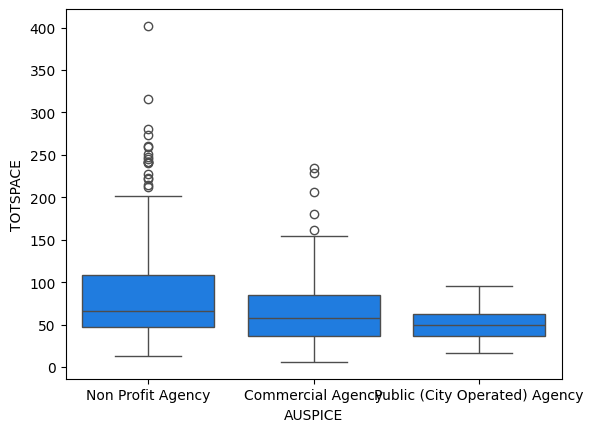

In [ ]:
# Generate a boxplot to see the data distribution by AUSPICE
# We can easily see the differences among Non-profit, Commercial and Public
ax = sns.boxplot(x='AUSPICE', y='TOTSPACE', data=df_clean, color='#007BFF')
plt.show()

In [27]:
# Ordinary Least Squares (OLS) model
model = ols('TOTSPACE ~ C(AUSPICE)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(AUSPICE),9.611211e+04,2.0,21.843051,5.057716e-10
Residual,2.332065e+06,1060.0,NaN,NaN


In [28]:
# ANOVA table
res = stat()
res.anova_stat(df=df_clean, res_var='TOTSPACE', anova_model='TOTSPACE ~ C(AUSPICE)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(AUSPICE),2.0,9.611211e+04,48056.057145,21.843051,5.057716e-10
Residual,1060.0,2.332065e+06,2200.061571,NaN,NaN


In [30]:
# post hoc test using Tukey's HSD
res = stat()
res.tukey_hsd(df=df_clean, res_var='TOTSPACE', xfac_var='AUSPICE', anova_model='TOTSPACE ~ C(AUSPICE)')
res.tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to 

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Non Profit Agency,Commercial Agency,17.119417,9.703599,24.535235,7.662434,0.001000
1,Non Profit Agency,Public (City Operated) Agency,34.334610,16.224077,52.445142,6.292710,0.001000
2,Commercial Agency,Public (City Operated) Agency,17.215193,-1.453146,35.883531,3.060857,0.077966


In [ ]:
# ANOVA assumptions check

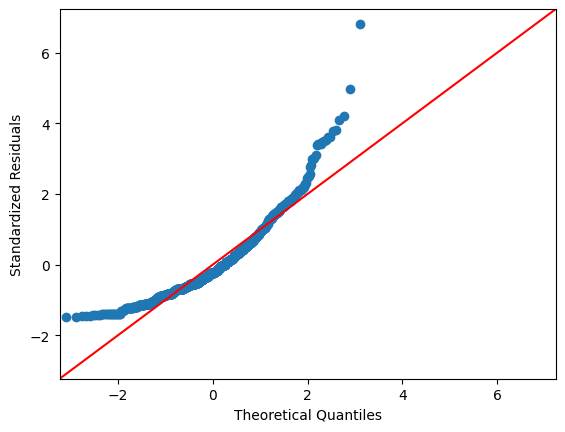

In [ ]:
# assumption 1: res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
# Q-Q plots
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

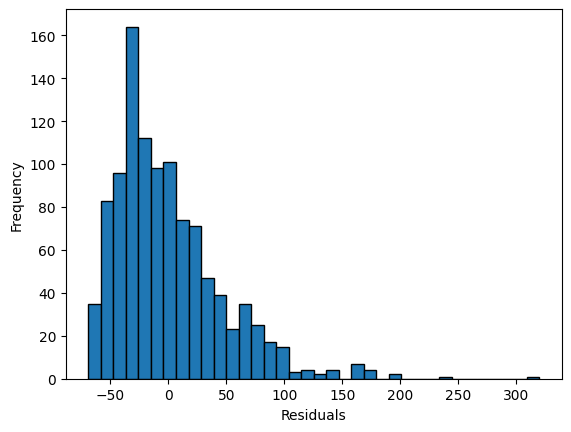

In [ ]:
# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [ ]:
#assumption 1: residuals are normally distributed: Shapiro Wilk test
w, pvalue = stats.shapiro(model.resid)
print("The w is :", w)
print("The p-vale is :",pvalue)

The w is : 0.901775598526001
The p-vale is : 1.4964898448030214e-25


In [43]:
#assumption 2: variances are homogenous: Levene's test when the sample is not normally distributed
res.levene(df=df, res_var='TOTSPACE', xfac_var='AUSPICE')
res.levene_summary

,Parameter,Value
0,Test statistics (W),9.1994
1,Degrees of freedom (Df),2.0000
2,p value,0.0001


In [ ]:
# Two-Way ANOVAS

<Axes: xlabel='AUSPICE', ylabel='TOTSPACE'>

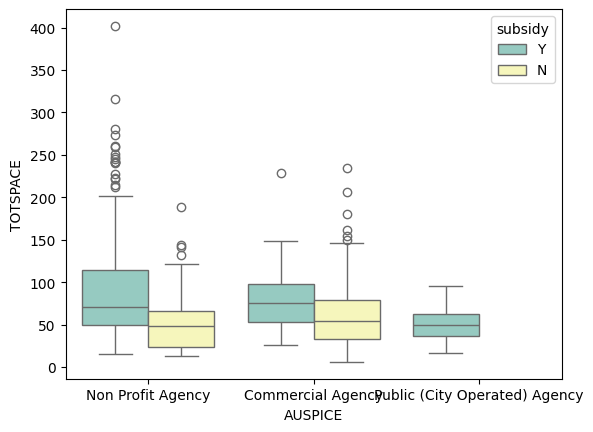

In [20]:
# Boxplot
sns.boxplot(x="AUSPICE", y="TOTSPACE", hue="subsidy",data=df_clean, palette="Set3")

In [32]:
# Fitting the ols model
model_2 = ols('TOTSPACE ~ C(AUSPICE) + C(subsidy) + C(AUSPICE):C(subsidy)', data=df_clean).fit()
# Calculate the analysis of variance table
anova_table = sm.stats.anova_lm(model_2, typ=2)
# Show the result
anova_table

,sum_sq,df,F,PR(>F)
C(AUSPICE),8.567996e+03,2.0,2.057586,1.282730e-01
C(subsidy),8.352744e+04,1.0,40.117876,3.529094e-10
C(AUSPICE):C(subsidy),5.603445e+04,2.0,13.456555,1.694282e-06
Residual,2.202809e+06,1058.0,NaN,NaN


In [34]:
# ANOVA table
res = stat()
res.anova_stat(df=df_clean, res_var='TOTSPACE', anova_model='TOTSPACE ~ C(AUSPICE) + C(subsidy) + C(AUSPICE):C(subsidy)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(AUSPICE),2.0,8.567996e+03,4283.998054,2.057586,1.282730e-01
C(subsidy),1.0,8.352744e+04,83527.441787,40.117876,3.529094e-10
C(AUSPICE):C(subsidy),2.0,5.603445e+04,28017.227037,13.456555,1.694282e-06
Residual,1058.0,2.202809e+06,2082.050461,NaN,NaN


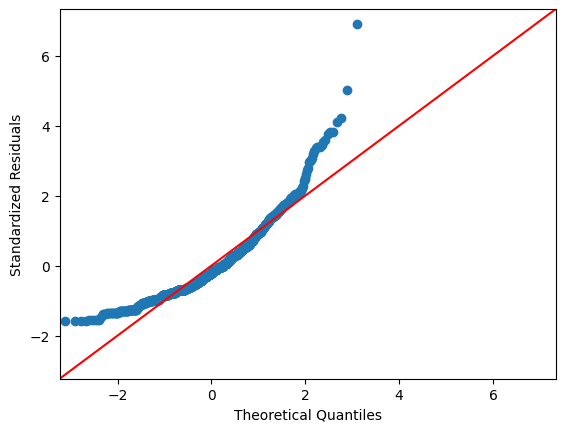

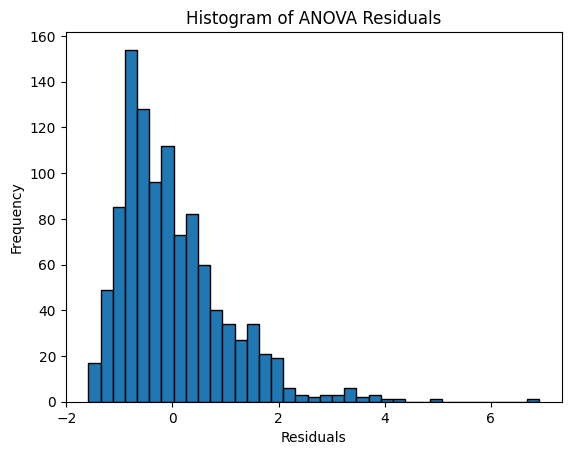

In [ ]:
# Standardize the residuals
residuals_2 = model_2.resid
standardized_residuals_2 = residuals_2 / residuals_2.std()

# assumption 1: res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
# Q-Q plot
sm.qqplot(standardized_residuals_2, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# Histogram
plt.hist(standardized_residuals_2, bins='auto', histtype='bar', ec='k')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.title("Histogram of ANOVA Residuals")
plt.show()



In [ ]:
# assumption 1: residuals are normally distributed: Shapiro Wilk test
w, pvalue = stats.shapiro(residuals_2)
print(w,pvalue)

0.9018619656562805 1.5311055543621852e-25


In [ ]:
# assumption 2: variances are homogenous: Levene's test when the sample is not normally distributed
# Use Levene's test
statistic, p_value = stats.levene(
    *[group['TOTSPACE'].values
        for name, group in df_clean.groupby(['AUSPICE', 'subsidy']) ])

print('Levene’s test statistic is :', statistic)
print('Levene’s test p-value is :', p_value)

Levene’s test statistic is : 12.984714966192847
Levene’s test p-value is : 2.51515889994611e-10


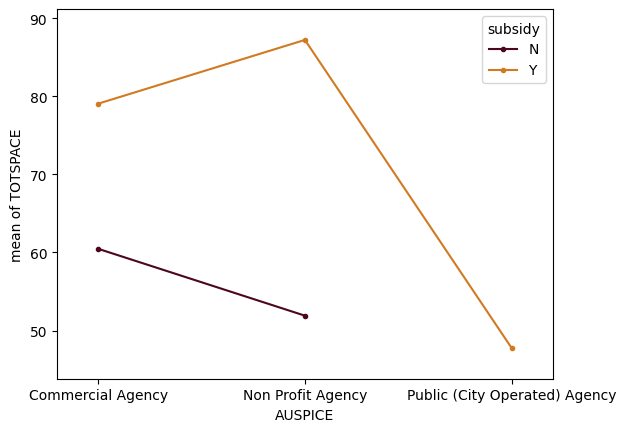

In [ ]:
# Make Interaction Plot

from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
fig = interaction_plot(x=df_clean['AUSPICE'],trace=df_clean['subsidy'],response=df_clean['TOTSPACE'],colors=['#4c061d','#d17a22'])
plt.show()

In [ ]:
# Post-hoc test using Tukey's HSD

In [37]:
res.tukey_hsd(df=df_clean, res_var='TOTSPACE',xfac_var='AUSPICE',anova_model='TOTSPACE ~ C(AUSPICE) + C(subsidy) + C(AUSPICE):C(subsidy)')
res.tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to 

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Non Profit Agency,Commercial Agency,17.119417,9.905213,24.333621,7.876596,0.001000
1,Non Profit Agency,Public (City Operated) Agency,34.334610,16.716448,51.952772,6.468588,0.001000
2,Commercial Agency,Public (City Operated) Agency,17.215193,-0.945610,35.375996,3.146407,0.067567


In [40]:
res.tukey_hsd(df=df_clean,res_var='TOTSPACE',xfac_var='subsidy',anova_model='TOTSPACE ~ C(AUSPICE) + C(subsidy) + C(AUSPICE):C(subsidy)')
res.tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Y,N,26.265831,20.400592,32.13107,12.426982,0.001


In [41]:
res.tukey_hsd(df=df_clean,res_var='TOTSPACE',xfac_var=['AUSPICE','subsidy'], anova_model='TOTSPACE ~ C(AUSPICE) + C(subsidy) + C(AUSPICE):C(subsidy)')
res.tukey_summary.head()

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  (df[xfac_var[1]] == ele2)].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  (df[xfac_var[1]] == ele2)].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,"(Non Profit Agency, Y)","(Non Profit Agency, N)",35.327657,21.377488,49.277825,10.224542,0.001000
1,"(Non Profit Agency, Y)","(Commercial Agency, Y)",8.165515,-7.512442,23.843471,2.102822,0.650278
2,"(Non Profit Agency, Y)","(Commercial Agency, N)",26.764597,16.861524,36.667669,10.911871,0.001000
3,"(Non Profit Agency, Y)","(Public (City Operated) Agency, Y)",39.460387,17.934574,60.986199,7.401338,0.001000
4,"(Non Profit Agency, Y)","(Public (City Operated) Agency, N)",0.000000,-inf,inf,0.000000,0.900000
